# Intensive Care in Germany

## Data Source

[DIVI-Intensivregister](https://www.intensivregister.de/) monitors the ICU capacities of 1,300 hospitals in Germany.

## Setup

In [1]:
# standard library
import datetime
import math

In [2]:
# third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Date this Notebook was run

In [3]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2021-08-16'

In [4]:
# style like ggplot in R
plt.style.use('ggplot')

In [5]:
# Avoid cutting off part of the axis labels, see:
# https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.rcParams.update({'figure.autolayout': True})

## Get Data

In [6]:
timeline_data = "https://diviexchange.blob.core.windows.net/%24web/bundesland-zeitreihe.csv"

In [7]:
timeline_df = pd.read_csv(timeline_data)

In [8]:
timeline_df.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8752,2021-08-16T12:15:00+02:00,SACHSEN_ANHALT,41,6,575,148,333,108,55,23,...,9,5,0,0,0,0,0,0,0,0
8753,2021-08-16T12:15:00+02:00,NORDRHEIN_WESTFALEN,313,166,4520,890,2399,716,360,166,...,76,21,0,0,0,0,0,0,0,0
8754,2021-08-16T12:15:00+02:00,DEUTSCHLAND,1311,542,18589,3925,10249,3398,1401,629,...,334,139,4,17,37,86,114,127,77,33


## Rename Columns

### Convert datatype of date column

In [9]:
timeline_df["Datum"] = timeline_df["Datum"].str[:10]
timeline_df.head()

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
0,2020-03-20,BADEN_WUERTTEMBERG,31,35,39,330,0,205,0,20,...,3,1,0,0,0,0,0,0,0,0
1,2020-03-20,HAMBURG,11,6,24,115,0,70,0,9,...,2,0,0,0,0,0,0,0,0,0
2,2020-03-20,BREMEN,3,2,0,18,0,11,0,1,...,1,0,0,0,0,0,0,0,0,0
3,2020-03-20,SACHSEN,20,3,44,272,0,215,0,16,...,2,0,0,0,0,0,0,0,0,0
4,2020-03-20,BRANDENBURG,20,2,50,142,0,81,0,15,...,1,0,0,0,0,0,0,0,0,0


In [10]:
timeline_df.iloc[ : , [0]] = timeline_df.iloc[ : , [0]].apply(pd.to_datetime)

In [11]:
timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8755 entries, 0 to 8754
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Datum                                       8755 non-null   datetime64[ns]
 1   Bundesland                                  8755 non-null   object        
 2   Anzahl_Meldebereiche_Erwachsene             8755 non-null   int64         
 3   Aktuelle_COVID_Faelle_Erwachsene_ITS        8755 non-null   int64         
 4   Belegte_Intensivbetten_Erwachsene           8755 non-null   int64         
 5   Freie_Intensivbetten_Erwachsene             8755 non-null   int64         
 6   7_Tage_Notfallreserve_Erwachsene            8755 non-null   int64         
 7   Freie_IV_Kapazitaeten_Gesamt                8755 non-null   int64         
 8   Freie_IV_Kapazitaeten_Davon_COVID           8755 non-null   int64         
 9   Betriebs

In [12]:
federal_level = timeline_df[timeline_df.Bundesland=='DEUTSCHLAND']
federal_level.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8720,2021-08-14,DEUTSCHLAND,1313,484,18686,3761,10242,3312,1418,625,...,327,140,3,15,33,78,98,109,82,28
8737,2021-08-15,DEUTSCHLAND,1312,512,18376,3988,10256,3432,1426,636,...,324,142,4,19,36,80,105,113,78,28
8754,2021-08-16,DEUTSCHLAND,1311,542,18589,3925,10249,3398,1401,629,...,334,139,4,17,37,86,114,127,77,33


## Used Beds (Adults)

In [13]:
used_beds = federal_level.loc[ : , ['Datum', 'Belegte_Intensivbetten_Erwachsene']]
used_beds.columns = ['date', 'ICU beds in use (adults)']
used_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 16 to 8754
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      515 non-null    datetime64[ns]
 1   ICU beds in use (adults)  515 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.1 KB


In [14]:
used_beds.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

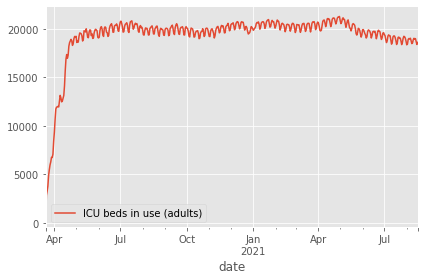

In [15]:
used_beds.plot()

## Covid-19 patients in ICU

In [16]:
icu = federal_level.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]

In [17]:
icu.columns = ['date', 'Covid-19 cases in ICU']
icu.set_index('date', inplace=True)
icu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515 entries, 2020-03-20 to 2021-08-16
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  515 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


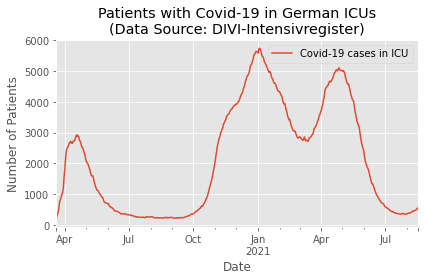

In [18]:
icu_cases = icu.plot(
    title='Patients with Covid-19 in German ICUs\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

In [19]:
fig = icu_cases.get_figure()
fig.savefig('img/covid-19-patients-in-icu-germany.png')

### Situation in North Rhine-Westphalia

NRW ist the state in Germany with the highest number of inhabitants.

In [20]:
nrw = timeline_df[timeline_df.Bundesland=='NORDRHEIN_WESTFALEN']
nrw.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8736,2021-08-15,NORDRHEIN_WESTFALEN,313,159,4484,888,2391,741,381,167,...,78,22,0,0,0,0,0,0,0,0
8753,2021-08-16,NORDRHEIN_WESTFALEN,313,166,4520,890,2399,716,360,166,...,76,21,0,0,0,0,0,0,0,0


In [21]:
icu_nrw = nrw.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_nrw.columns = ['date', 'Covid-19 cases in ICU']
icu_nrw.set_index('date', inplace=True)
icu_nrw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515 entries, 2020-03-20 to 2021-08-16
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  515 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


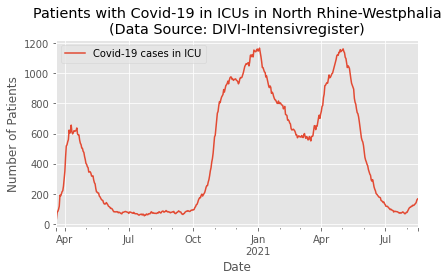

In [22]:
icu_cases_nrw = icu_nrw.plot(
    title='Patients with Covid-19 in ICUs in North Rhine-Westphalia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Rhineland-Palatinate

In [23]:
rlp = timeline_df[timeline_df.Bundesland=='RHEINLAND_PFALZ']
rlp.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8726,2021-08-15,RHEINLAND_PFALZ,77,28,767,245,421,186,88,38,...,17,5,0,0,0,0,0,0,0,0
8743,2021-08-16,RHEINLAND_PFALZ,77,28,776,244,424,179,81,34,...,18,7,0,0,0,0,0,0,0,0


In [24]:
icu_rlp = rlp.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_rlp.columns = ['date', 'Covid-19 cases in ICU']
icu_rlp.set_index('date', inplace=True)
icu_rlp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515 entries, 2020-03-20 to 2021-08-16
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  515 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


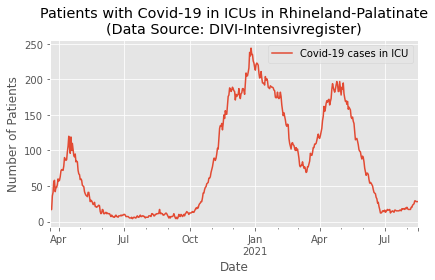

In [25]:
icu_cases_rlp = icu_rlp.plot(
    title='Patients with Covid-19 in ICUs in Rhineland-Palatinate\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

### Situation in Saxony

Saxonia had high case numbers during the pandemic.

In [26]:
saxonia = timeline_df[timeline_df.Bundesland=='SACHSEN']
saxonia.tail(2)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,...,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe,Stratum_17_Minus,Stratum_18_Bis_29,Stratum_30_Bis_39,Stratum_40_Bis_49,Stratum_50_Bis_59,Stratum_60_Bis_69,Stratum_70_Bis_79,Stratum_80_Plus
8725,2021-08-15,SACHSEN,78,16,1160,298,628,303,93,47,...,14,9,0,0,0,0,0,0,0,0
8742,2021-08-16,SACHSEN,78,18,1160,298,622,306,101,46,...,15,9,0,0,0,0,0,0,0,0


In [27]:
icu_saxonia = saxonia.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]
icu_saxonia.columns = ['date', 'Covid-19 cases in ICU']
icu_saxonia.set_index('date', inplace=True)
icu_saxonia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515 entries, 2020-03-20 to 2021-08-16
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  515 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


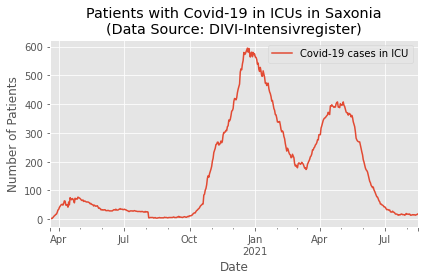

In [28]:
icu_cases_saxonia = icu_saxonia.plot(
    title='Patients with Covid-19 in ICUs in Saxonia\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')